In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Polynomial Regression

In [4]:
mu = 7.0
sigma = 0.56
n_samples = 500

x = np.random.lognormal(mean=mu, sigma=sigma, size=n_samples)

In [5]:
np.mean(x), np.max(x), np.min(x), np.std(x)

(1263.4563569310483, 4130.242523954748, 166.45977891654883, 716.9805296920675)

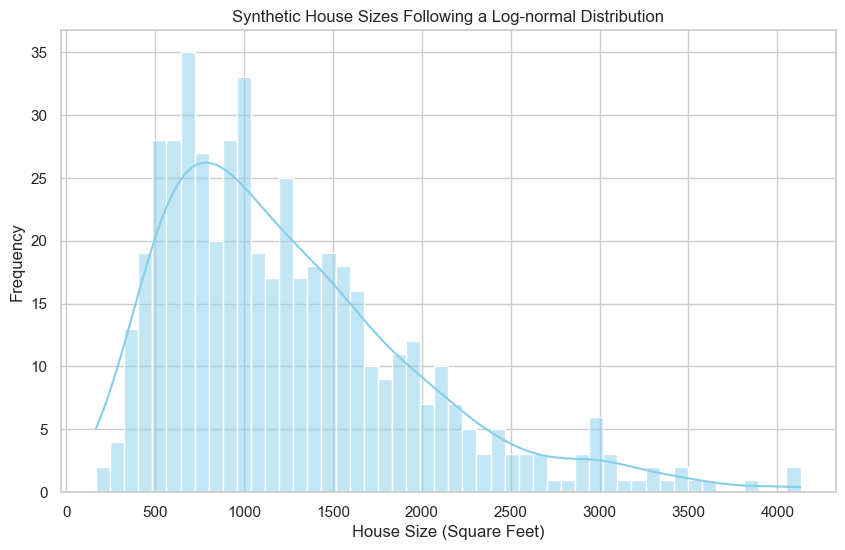

In [6]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of the house sizes
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=50, kde=True, color='skyblue')

# Add titles and labels
plt.title('Synthetic House Sizes Following a Log-normal Distribution')
plt.xlabel('House Size (Square Feet)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [7]:

def get_scaled_feature(X: np.array):
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    
    return (X - m) / s

x = get_scaled_feature(X=x)

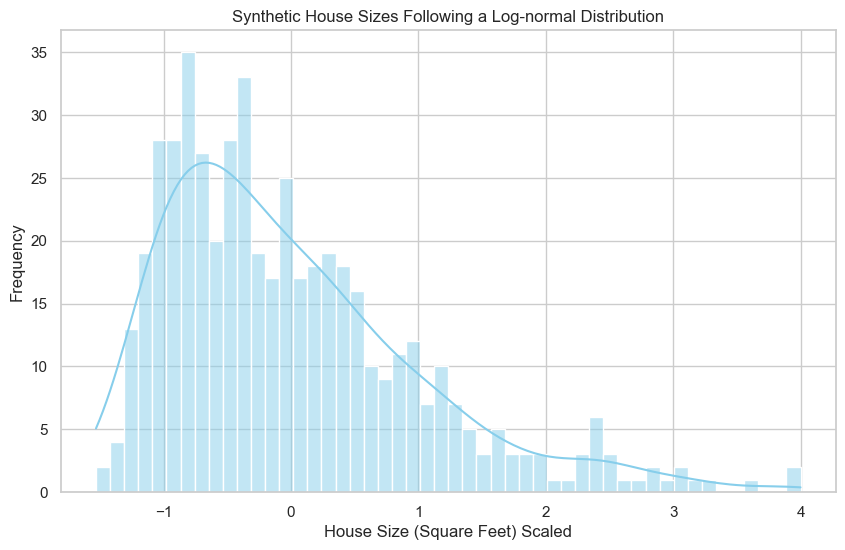

In [8]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of the house sizes
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=50, kde=True, color='skyblue')

# Add titles and labels
plt.title('Synthetic House Sizes Following a Log-normal Distribution')
plt.xlabel('House Size (Square Feet) Scaled')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [9]:
noise = np.random.normal(2.5, 2.4, size=n_samples)

y = 1.5 - (0.02 * x) + (2.2 * x**2) + noise

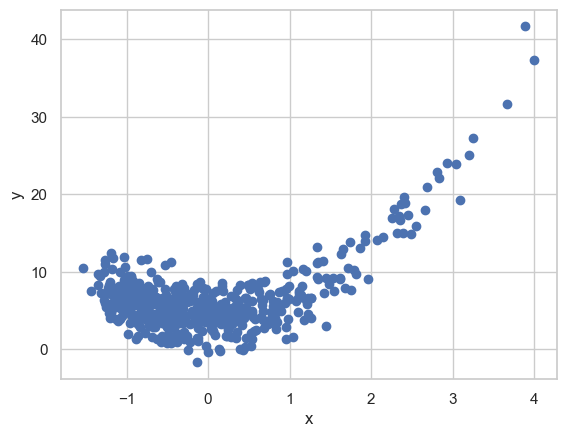

In [10]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(x.reshape(-1, 1))
X.shape

(500, 5)

In [12]:
X

array([[ 1.00000000e+00,  5.37168459e-01,  2.88549954e-01,
         1.54999934e-01,  8.32610757e-02],
       [ 1.00000000e+00, -1.31546431e-01,  1.73044635e-02,
        -2.27634041e-03,  2.99444456e-04],
       [ 1.00000000e+00, -1.16825815e+00,  1.36482711e+00,
        -1.59447040e+00,  1.86275304e+00],
       ...,
       [ 1.00000000e+00, -1.00123040e+00,  1.00246231e+00,
        -1.00369574e+00,  1.00493068e+00],
       [ 1.00000000e+00, -6.29116929e-01,  3.95788110e-01,
        -2.48997000e-01,  1.56648228e-01],
       [ 1.00000000e+00, -6.56038683e-01,  4.30386754e-01,
        -2.82350359e-01,  1.85232758e-01]])

In [13]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=47)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 5), (125, 5), (375, 1), (125, 1))

In [16]:
theta = stats.uniform.rvs(0, 1, size=(X_train.shape[1], 1))
theta

array([[0.5749158 ],
       [0.92549441],
       [0.70060158],
       [0.10706601],
       [0.31012354]])

In [17]:

def cost_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./2*m) * np.sum(diff**2)
    
    return cost


def gradient_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient

In [18]:

def train(X_train, y_train, n_iterations: int=10000, lr: float=0.0001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [19]:
n_iterations = 30000

opt_theta, cost = train(X_train=X_train, y_train=y_train, n_iterations=n_iterations)

The cost at 0th iteration is 41168404.03719513
Theta: [[-0.31088769 -0.27451845 -0.97184704 -0.75494335 -0.52421375]]
************************************************

The cost at 10th iteration is 16168374.656848203
Theta: [[-0.30118105 -0.26419583 -0.93272019 -0.63997515 -0.12012715]]
************************************************

The cost at 20th iteration is 7852011.623450011
Theta: [[-0.29297319 -0.25801933 -0.90759203 -0.57279819  0.11233986]]
************************************************

The cost at 30th iteration is 5080474.580842698
Theta: [[-0.28563336 -0.2542342  -0.89053868 -0.53317567  0.2458699 ]]
************************************************

The cost at 40th iteration is 4151781.6051439648
Theta: [[-0.27879795 -0.25182885 -0.87814505 -0.50944112  0.32236432]]
************************************************

The cost at 50th iteration is 3835582.8140036627
Theta: [[-0.27225732 -0.25022009 -0.86844236 -0.49486885  0.36597912]]
**********************************

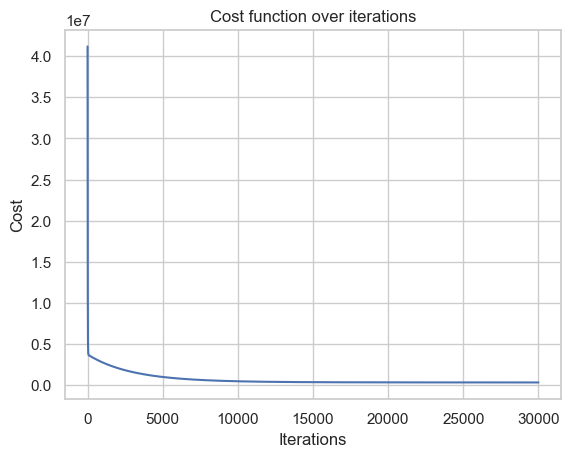

In [20]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [21]:
opt_theta

array([[ 3.88710594e+00],
       [-2.68807911e-01],
       [ 2.44754504e+00],
       [ 1.71711898e-03],
       [-1.20900683e-02]])

In [22]:
y_train_pred = np.dot(opt_theta.T, X_train.T)
y_train_pred.shape, y_train.shape

((1, 375), (375, 1))

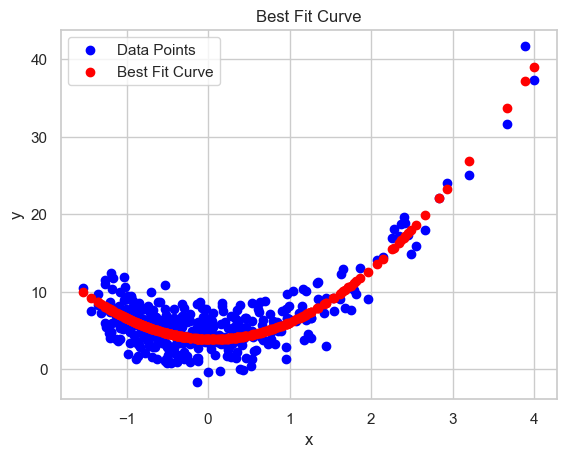

In [23]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [24]:
y_pred = np.dot(opt_theta.T, X_test.T)
y_pred.shape, y_test.shape

((1, 125), (125, 1))

In [25]:
diff = y_pred - y_test.T
sq_error = np.sum(diff**2)
mse = sq_error / y_test.shape[0]
mse

5.574178616963009

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
# using sklearn
mean_squared_error(y_pred=y_pred, y_true=y_test.T)

5.574178616963009

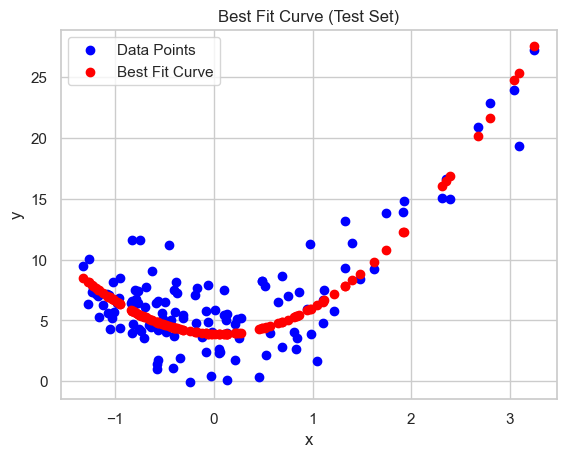

In [28]:
# Plot the original data points
plt.scatter(X_test[:, 1], y_test[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_test[:, 1], y_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve (Test Set)')

# Show the legend
plt.legend()
plt.show()

In [30]:
# without regularization
opt_theta

array([[ 3.88710594e+00],
       [-2.68807911e-01],
       [ 2.44754504e+00],
       [ 1.71711898e-03],
       [-1.20900683e-02]])

#### Training with Regularization

In [31]:


def train_with_regularization(X_train, y_train, n_iterations: int=10000, lr: float=0.0001, 
                            lambda_: float=0.1, m: int=X_train.shape[0]):
    
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # calculate the fraction
        frac = lr * (lambda_/m)
        
        # update the theta 
        theta = theta * (1 - frac) - (lr * gradient)
    
    return theta, np.array(costs)

In [33]:
n_iterations = 20000

theta_regularized, cost_regularized = train_with_regularization(X_train=X_train, 
                                                                y_train=y_train, 
                                                                n_iterations=n_iterations
                                                                )

The cost at 0th iteration is 57828187.4985763
Theta: [[-0.47733184 -0.09126646 -0.18078883 -0.18283376 -0.9681    ]]
************************************************

The cost at 10th iteration is 21283267.243892796
Theta: [[-0.46715515 -0.0798068  -0.13578292 -0.04603649 -0.47864122]]
************************************************

The cost at 20th iteration is 9131874.100080078
Theta: [[-0.45878814 -0.07335743 -0.10769951  0.0329786  -0.19670412]]
************************************************

The cost at 30th iteration is 5087658.141101193
Theta: [[-0.45146813 -0.06979657 -0.08937557  0.07868148 -0.03440206]]
************************************************

The cost at 40th iteration is 3737870.9960370427
Theta: [[-0.44475545 -0.067901   -0.07668164  0.10517904  0.05893138]]
************************************************

The cost at 50th iteration is 3283592.317210602
Theta: [[-0.4383966  -0.06696554 -0.0672371   0.12060386  0.1125052 ]]
************************************

In [34]:
y_train_pred_reg = np.dot(theta_regularized.T, X_train.T)
y_train_pred_reg.shape, y_train.shape

((1, 375), (375, 1))

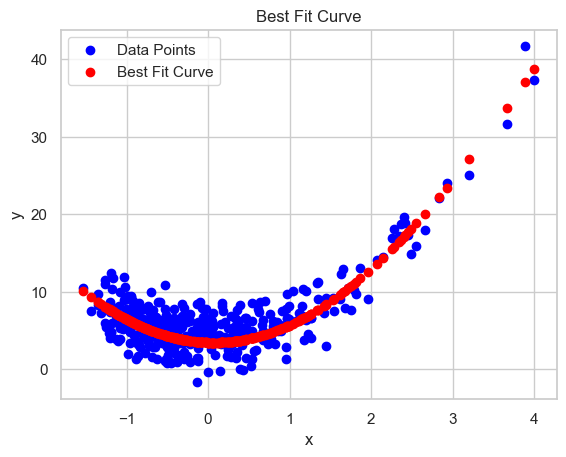

In [35]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred_reg.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

##### Using Sklearn

In [64]:
model = LinearRegression()

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [3.95749091]
Coefficient: [ 0.54852601  2.38569248 -0.22907185  0.03970186]


In [66]:
from sklearn.linear_model import SGDRegressor

In [74]:
model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.0001)

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [1.03801535e+09]
Coefficient: [ 1.81010466e+09  4.13021781e+09  6.00310881e+09 -4.71965470e+09]
